<a href="https://colab.research.google.com/github/tahsinulhq/image_processing/blob/main/Image_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

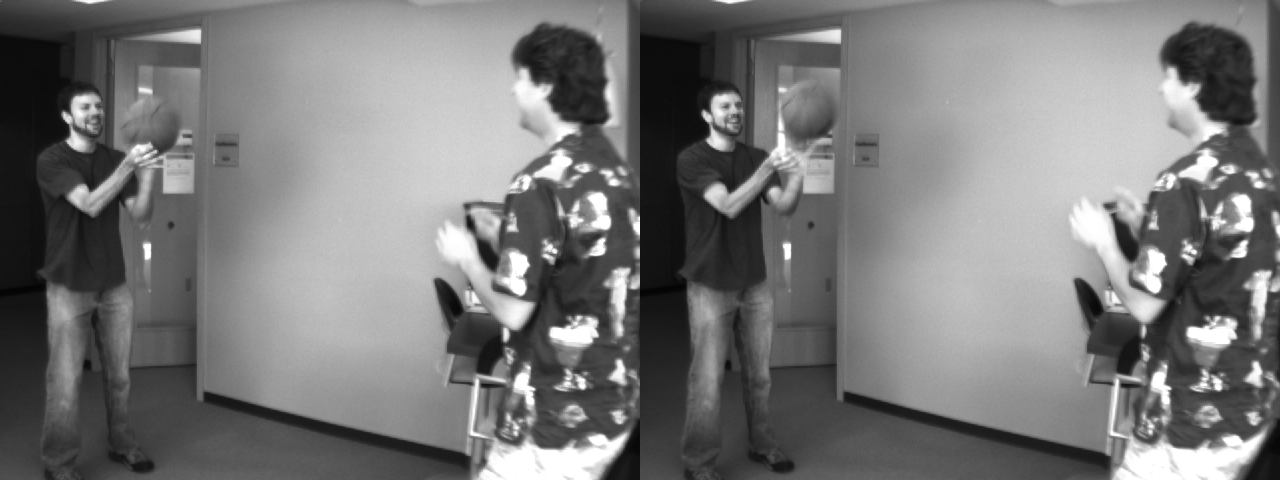

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('basketball1.png')
img1 = cv2.imread('basketball2.png')
images = cv2.hconcat([img, img1])
cv2_imshow( images)

cv2.destroyAllWindows()

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

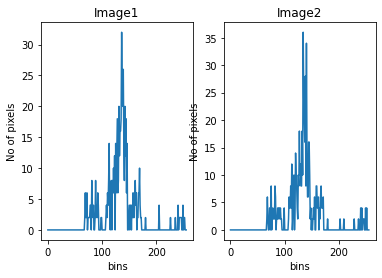

In [9]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.subplot(122)
plt.title("Image2")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist1)
plt.show()

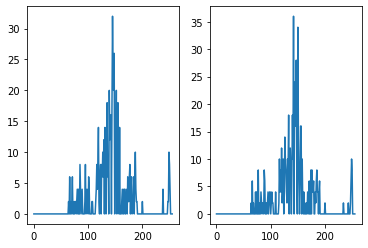

In [10]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
gray_img1_eqhist=cv2.equalizeHist(gray_img1)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(hist1)
plt.show()

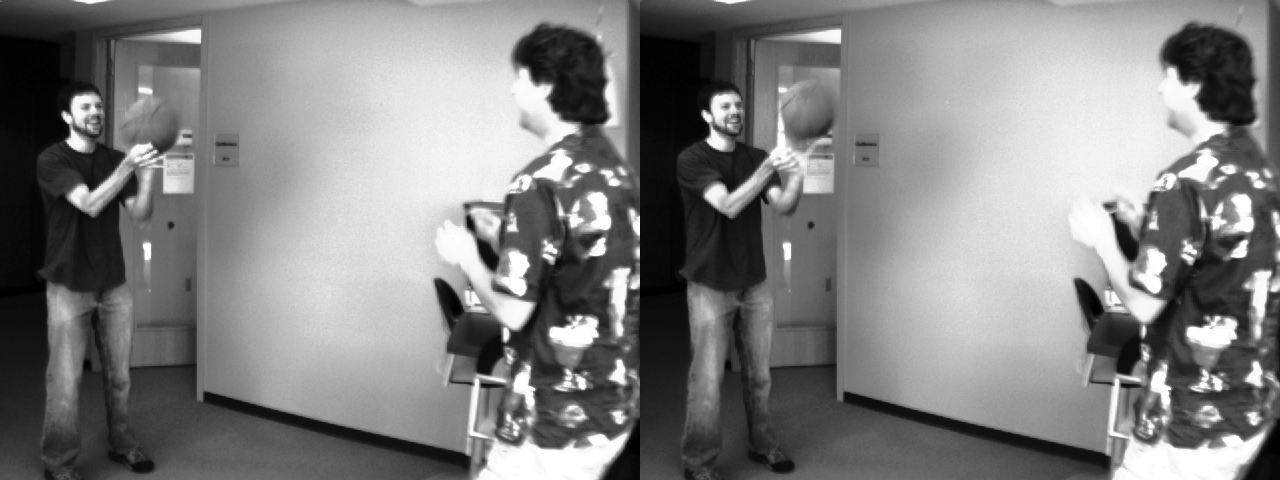

In [13]:
eqhist_images=np.concatenate((gray_img_eqhist,gray_img1_eqhist),axis=1)
cv2_imshow(eqhist_images)
cv2.waitKey(0)
cv2.destroyAllWindows()

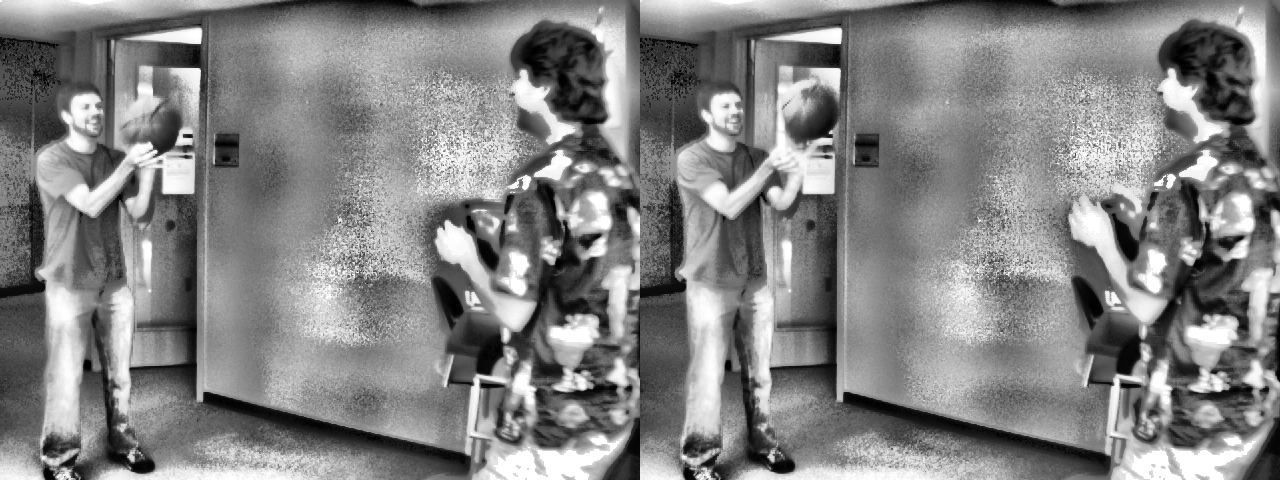

In [15]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
gray_img1_clahe=clahe.apply(gray_img1_eqhist)
images=np.concatenate((gray_img_clahe,gray_img1_clahe),axis=1)
cv2_imshow(images)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
th=80
max_val=255
ret, o1 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final=np.concatenate((o1,o2,o3),axis=1)
final1=np.concatenate((o4,o5,o6),axis=1)

cv2.imwrite("Image1.jpg",final)
cv2.imwrite("Image2.jpg",final1)

True

In [20]:
gray_image = cv2.imread('basketball1.png',0)
gray_image1 = cv2.imread('basketball2.png',0)
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)
thresh11 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh21 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 5)
thresh31 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,5 )
thresh41 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 5)

final=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
final1=np.concatenate((thresh11,thresh21,thresh31,thresh41),axis=1)
cv2.imwrite('rect.jpg',final)
cv2.imwrite('rect1.jpg',final1)

True

In [21]:
gray_image = cv2.imread('basketball1.png',0)
gray_image1 = cv2.imread('basketball2.png',0)
ret,thresh1 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(gray_image1,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite('rect.jpeg',np.concatenate((thresh1,thresh2),axis=1))

True